# MFCC Parameter Tuning 

In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
import librosa
import math
from librosa import feature
from IPython import display
from matplotlib import cm
from functools import partial
np_load_old = partial(np.load)
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

%matplotlib inline

In [19]:
audio_data = np.load('../data/d_dataset_0/dataset.npz')['ns_audio_data']
mfcc_record = np.load('../data/d_records/d_record_set_2/prep_exp11/features.npy')

In [8]:
def split_audio(audio_data):
    # split audio
    split_audio = np.array([data[:math.ceil(0.5*len(data))] if j == 0 else data[math.floor(0.5*len(data)):] for i, data in enumerate(audio_data) for j in range(2)])
    return split_audio

In [21]:
audio_data_split = split_audio(audio_data)

In [22]:
audio_data_split.shape

(200,)

In [23]:
len(max(audio_data_split, key=len))

16507

In [52]:
a = [1, 0, 0]

np.pad(a, (8-len(a), 0), 'constant')

array([0, 0, 0, 0, 0, 1, 0, 0])

In [56]:
audio_length = 16507
audio_pad = np.array([data[:audio_length] if data.shape[0] > audio_length else np.pad(data, (max(audio_length - data.shape[0]),0), "constant") for data in audio_data_split])

TypeError: 'int' object is not iterable

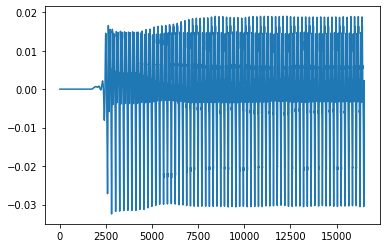

In [55]:
plt.plot(audio_pad[10])

In [25]:
mfcc.shape

(20, 31)

In [3]:
def plot_mfcc(mfcc):
    fig, ax = plt.subplots(figsize=(10,5))
    cax = ax.imshow(np.swapaxes(mfcc, 0 ,1), interpolation='nearest', cmap=cm.coolwarm, origin='lower')
    ax.set_title('MFCC')

    plt.show()

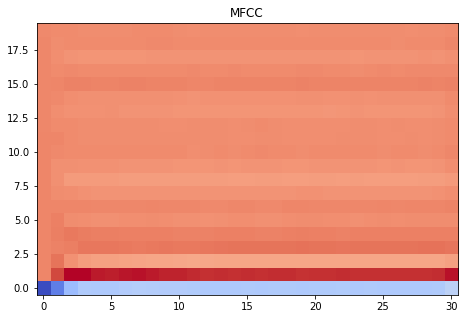

In [38]:
mfcc = librosa.feature.mfcc(audio_data_split[0], sr=22050, n_fft=2048, hop_length=512)
mfcc = np.swapaxes(mfcc ,0,1)
plot_mfcc(mfcc)

In [39]:
mfcc.shape

(31, 20)